In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [3]:
#name = 'chess.dat'
name = 'mushroom.dat'

dataset = name

data = pd.read_csv(dataset, sep=' ', header=None)
data.fillna(0,inplace=True)
data=data.astype(int)
data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,3,9,13,23,25,34,36,38,40,...,67,76,85,86,90,93,98,107,113,0
1,2,3,9,14,23,26,34,36,39,40,...,67,76,85,86,90,93,99,108,114,0
2,2,4,9,15,23,27,34,36,39,41,...,67,76,85,86,90,93,99,108,115,0
3,1,3,10,15,23,25,34,36,38,41,...,67,76,85,86,90,93,98,107,113,0
4,2,3,9,16,24,28,34,37,39,40,...,67,76,85,86,90,94,99,109,114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,...,73,83,85,88,90,93,106,112,119,0
8120,2,3,9,13,24,28,35,36,39,50,...,73,83,85,87,90,93,106,110,119,0
8121,2,6,9,13,24,28,35,36,39,41,...,73,83,85,88,90,93,106,112,119,0
8122,1,7,10,13,24,31,34,36,38,48,...,67,76,85,86,90,94,102,110,119,0


In [4]:
row = len(data)
col = len(data.values[0])
#print(row, col)

In [5]:
records_List = []
for i in range(0, row):
    records_List.append([
                        int(data.values[i,j])
                        for j in range(0, col)
                            if (int(data.values[i,j]) != 0)
                       ])
#records_List

In [6]:
te = TransactionEncoder()
te_ary = te.fit(records_List).transform(records_List)
dataX = pd.DataFrame(te_ary, columns=te.columns_)
dataX = dataX.astype(int)
#dataX

In [7]:
fpgrowth(dataX, min_support=.8)

,support,itemsets
0,1.000000,(84)
1,0.975382,(85)
2,0.974151,(33)
3,0.921713,(89)
4,0.838503,(35)
5,0.975382,"(84, 85)"
6,0.974151,"(33, 84)"
7,0.973166,"(33, 85)"
8,0.973166,"(33, 84, 85)"
9,0.921713,"(89, 84)"


In [11]:
threshold = 1
total_Time = []
threshold_value = []

for i in range(0,10):
  begin = time.time()
  result = fpgrowth(dataX, min_support=threshold)
  end = time.time()
  total_Time.append(end-begin)
  threshold_value.append(threshold)
  threshold -= 0.1
  print(begin,end)
total_Time
#threshold_value

1632149473.3042185 1632149473.3730795
1632149473.3730795 1632149473.4468749
1632149473.4468749 1632149473.5259392
1632149473.5259392 1632149473.602734
1632149473.602734 1632149473.6895475
1632149473.6895475 1632149473.786244
1632149473.786244 1632149473.9029315
1632149473.9029315 1632149474.0545661
1632149474.0545661 1632149474.5332932
1632149474.5332932 1632149478.1575956


[0.06886100769042969,
 0.07379531860351562,
 0.07906436920166016,
 0.07679486274719238,
 0.08681344985961914,
 0.09669637680053711,
 0.11668753623962402,
 0.15163469314575195,
 0.4787271022796631,
 3.624302387237549]

In [12]:
print(total_Time)
print(threshold_value)

[0.06886100769042969, 0.07379531860351562, 0.07906436920166016, 0.07679486274719238, 0.08681344985961914, 0.09669637680053711, 0.11668753623962402, 0.15163469314575195, 0.4787271022796631, 3.624302387237549]
[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]


-->**Mushroom**

[0.25842881202697754, 0.10440802574157715, 0.1211397647857666, 0.10687017440795898, 0.12969374656677246, 0.1438894271850586, 0.1778252124786377, 0.23185992240905762, 0.5937631130218506, 4.875962972640991]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

-->**Chess**

[0.03931140899658203, 0.07153558731079102, 0.2961697578430176, 1.0832898616790771, 4.8713319301605225, 20.427759408950806, 96.04614901542664]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]

<function matplotlib.pyplot.show(close=None, block=None)>

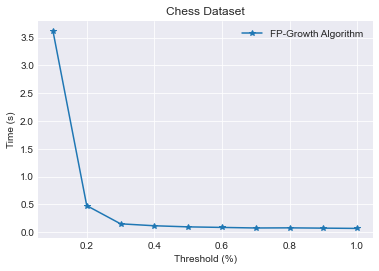

In [13]:
plt.style.use('seaborn-darkgrid')

plt.plot(threshold_value, total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['FP-Growth Algorithm'], loc='upper right')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Apriori/Chess_apriori.pdf', dpi=300, bbox_inches='tight')
plt.show